# Import Required Libraries


In [24]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Generating a synthetic dataset


In [25]:
date_range = pd.date_range(start='2020-01-01', end='2023-01-01', freq='D')
np.random.seed(42)
sales_data = np.random.poisson(lam=50, size=len(date_range))


# Print Dataset

In [26]:
df.head()

,Sales
Date,
2020-01-01,47
2020-01-02,55
2020-01-03,42
2020-01-04,52
2020-01-05,58


# Creating a DataFrame

In [27]:
df = pd.DataFrame({'Date': date_range, 'Sales': sales_data})
df.set_index('Date', inplace=True)


# Plotting the sales data


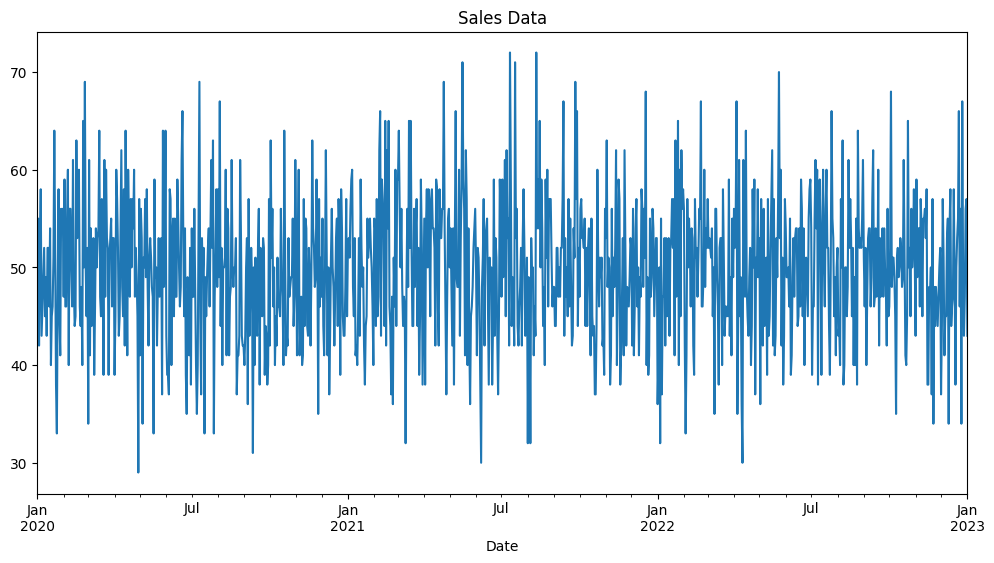

In [28]:
df['Sales'].plot(title='Sales Data', figsize=(12, 6))
plt.show()


# Decomposing the time series


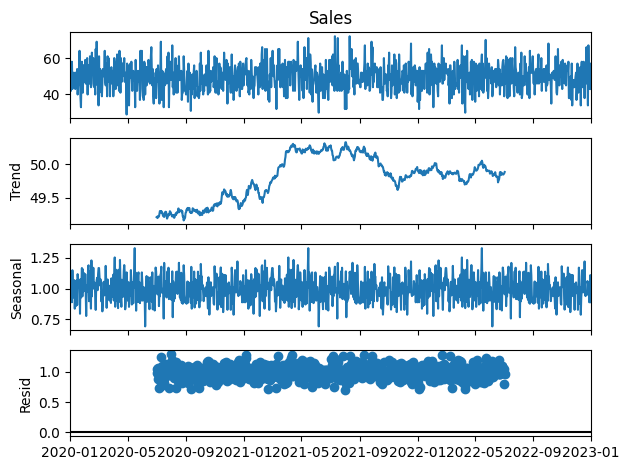

In [29]:
decomposition = seasonal_decompose(df['Sales'], model='multiplicative', period=365)
decomposition.plot()
plt.show()


# Holt-Winters Exponential Smoothing


In [30]:
model = ExponentialSmoothing(df['Sales'], seasonal='multiplicative', seasonal_periods=365)
fit = model.fit()


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


# Sales Forecasting

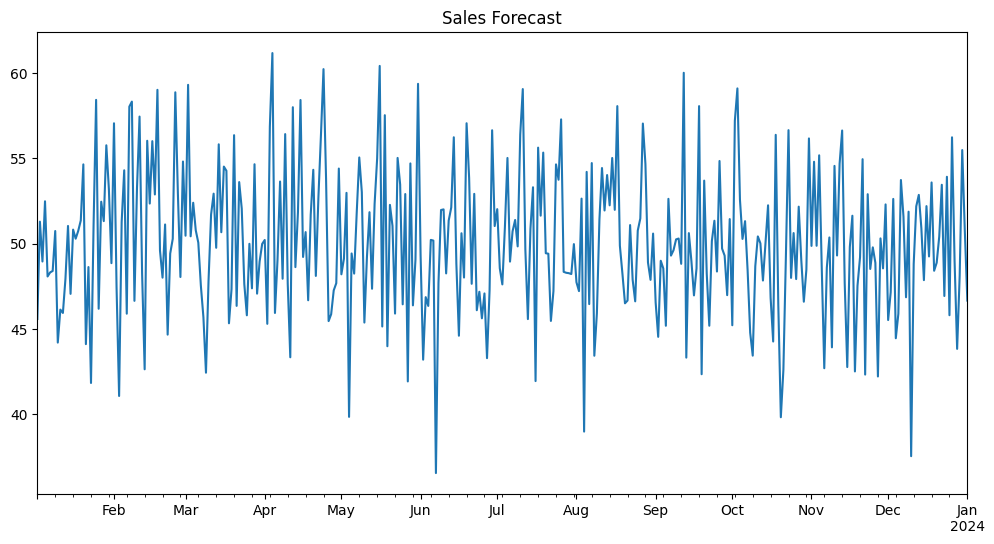

In [32]:
forecast = fit.forecast(steps=365)
forecast.plot(title='Sales Forecast', figsize=(12, 6))
plt.show()